#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






Подгружаем библиотеки:

In [5]:
!pip install heartpy

In [6]:
!pip install wfdb

In [7]:
#модули, которые нам понадобятся
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


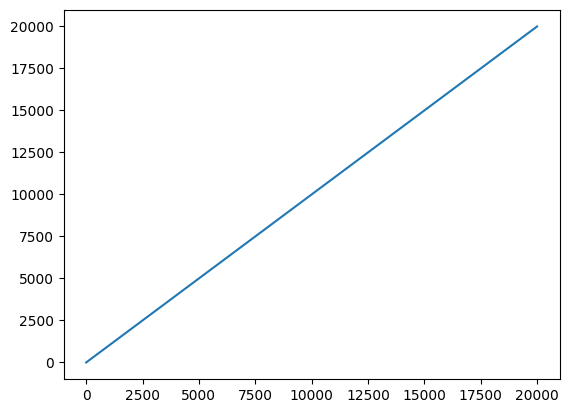

,",MLII"
0,0.995
1,1.995
2,2.995
3,3.995
4,4.995


In [9]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Python-BMT-main/Python-BMT-main/Seminar6/ecg.csv', header = 'infer', sep=';', decimal = ',')
plt.plot(df[',MLII'])
plt.show()
df.head()

Данные успешно подгружаются

Примеры использования функций для обработки сигнала:

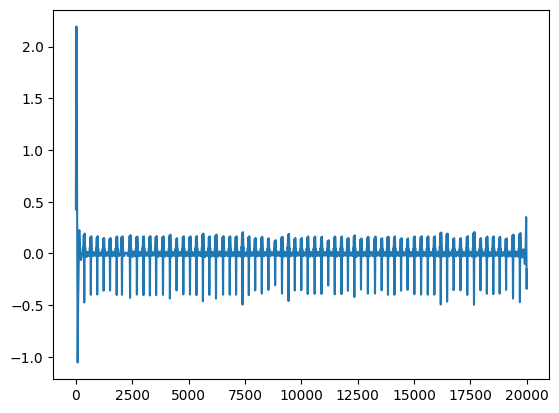

In [10]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df[',MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

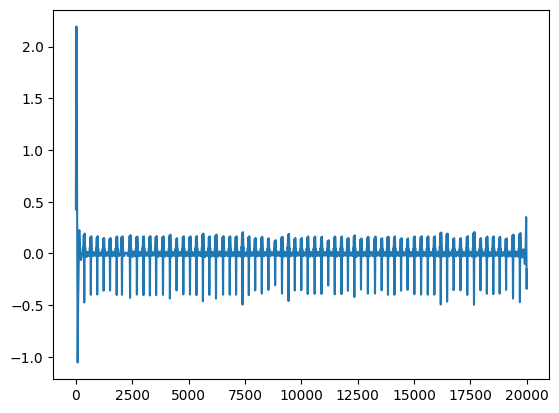

In [11]:
#поиск точек максимума с библиотекой scipy
peaks, _ = find_peaks(filtered, height=20)
plt.plot(filtered)
plt.plot(peaks, filtered[peaks])
plt.show()

Описание Класса

In [12]:
class Experiment:
  def __init__(self, data):
    self.data = data['date']
    self.path_signal = data['signal']
    self.parameters = data['parameters']
  def get_date(self):
    return self.data


  def get_signal_length(self):
    df=pd.read_csv(self.path_signal)
    return len (df)

  def plot_signal(self):
    df = pd.read_csv(self.path_signal)
    plt.plot(df['MLII'])
    plt.show()

  def _signal_filtration(self, signal, **filtration_parametres):
    filtered = hp.filter_signal(signal, **filtration_parametres)
    return filtered


  def _signal_find_peaks(self, filtered, **find_peaks_parametres):
    peaks, _ = find_peaks(filtered, **find_peaks_parametres)
    plt.plot(filtered)
    plt.plot(peaks, filtered[peaks])
    plt.show()
    return peaks.tolist()


  def _calculate_RR_intervals(self):
    df = pd.read_csv(self.path_signal)
    filtered = self._signal_filtration(df['MLII'], **self.parameters['filtration_parametres'])
    peaks = self._signal_find_peaks(filtered, **self.parameters['find_peaks_parametres'])
    new_array = []
    for i in range(len(peaks)-1):
      new_array.append(peaks[i+1]-peaks[i])

    return new_array

  def get_RR_statistics(self):
    RRs = self._calculate_RR_intervals()
    RR_statistics = {}
    RR_statistics['mean'] = np.mean(RRs)
    RR_statistics['std'] = np.std(RRs)
    RR_statistics['min'] = np.min(RRs)
    RR_statistics['max'] = np.max(RRs)
    return RR_statistics



Файл с ЭКГ сигналом (ecg.csv) в папке

Теперь используем его для создания класса Experiment:

In [13]:
experiment = Experiment(
    {'date': '2023-01-05',
      'signal': '/content/gdrive/MyDrive/Colab Notebooks/Python-BMT-main/Python-BMT-main/Seminar7/ecg.csv',
      'parameters': {'filtration_parametres': {'cutoff': [0.75, 3.5],
                                               'sample_rate': 100,
                                               'order': 3,
                                               'filtertype': 'bandpass'},
                     'find_peaks_parametres': {'height': 20}
                     }
    }
)


In [14]:
print(experiment.get_date())

2023-01-05


In [15]:
print(experiment.get_signal_length())

20000


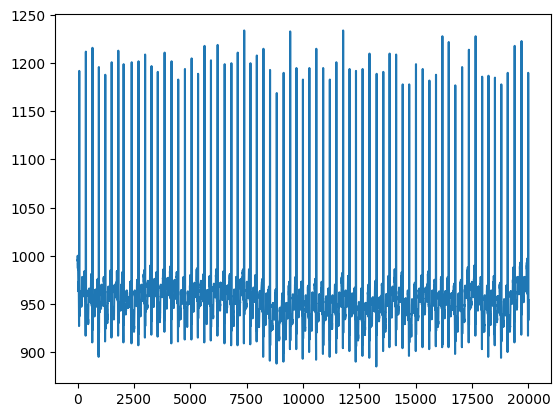

None


In [16]:
print(experiment.plot_signal())

In [17]:
filtered = experiment._signal_filtration(df[',MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
print(filtered)

[ 0.42537046  0.62337197  0.80000364 ... -0.22265981 -0.18906577
 -0.15507731]


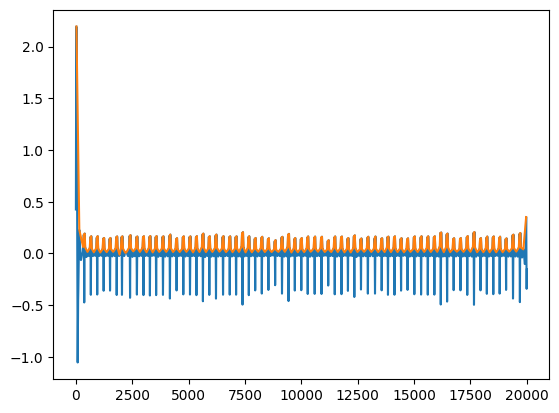

[24, 152, 320, 350, 390, 416, 515, 614, 642, 682, 708, 795, 898, 926, 966, 992, 1082, 1182, 1211, 1250, 1276, 1364, 1466, 1495, 1534, 1560, 1651, 1760, 1789, 1829, 1856, 1934, 1994, 2024, 2064, 2090, 2192, 2229, 2355, 2382, 2423, 2448, 2542, 2657, 2685, 2725, 2750, 2840, 2949, 2977, 3017, 3043, 3132, 3234, 3262, 3302, 3327, 3408, 3511, 3539, 3579, 3605, 3696, 3813, 3842, 3882, 3907, 4006, 4121, 4149, 4190, 4215, 4308, 4417, 4446, 4485, 4510, 4604, 4715, 4744, 4784, 4810, 4901, 5011, 5040, 5080, 5106, 5195, 5298, 5326, 5366, 5392, 5479, 5585, 5613, 5653, 5678, 5769, 5870, 5898, 5938, 5963, 6056, 6165, 6193, 6233, 6259, 6364, 6477, 6506, 6546, 6572, 6659, 6774, 6803, 6843, 6869, 6950, 7056, 7085, 7125, 7150, 7236, 7343, 7370, 7411, 7436, 7525, 7621, 7649, 7689, 7715, 7804, 7904, 7933, 7972, 7998, 8087, 8197, 8225, 8265, 8291, 8381, 8490, 8519, 8558, 8584, 8681, 8788, 8817, 8857, 8883, 8979, 9092, 9121, 9161, 9187, 9269, 9384, 9411, 9451, 9477, 9559, 9661, 9690, 9729, 9755, 9843, 9948, 99

In [18]:
print(experiment._signal_find_peaks(filtered))

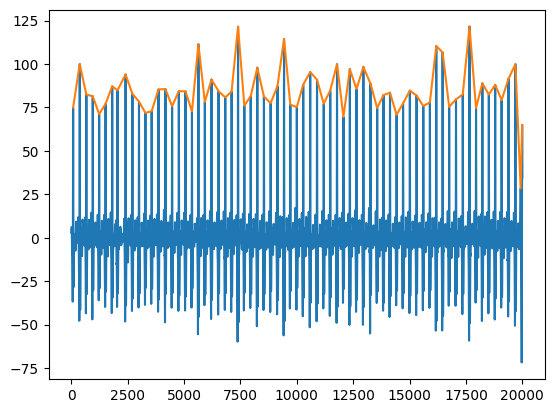

[293,
 293,
 284,
 284,
 284,
 294,
 236,
 358,
 303,
 292,
 285,
 277,
 303,
 308,
 295,
 299,
 295,
 287,
 287,
 284,
 296,
 313,
 297,
 282,
 285,
 279,
 283,
 293,
 293,
 298,
 304,
 290,
 279,
 288,
 284,
 309,
 303,
 298,
 288,
 301,
 285,
 284,
 295,
 305,
 317,
 295,
 280,
 289,
 292,
 288,
 300,
 299,
 297,
 293,
 283,
 282,
 290,
 303,
 300,
 299,
 290,
 280,
 287,
 282,
 285,
 307,
 305,
 233,
 66]

In [19]:
experiment._calculate_RR_intervals()

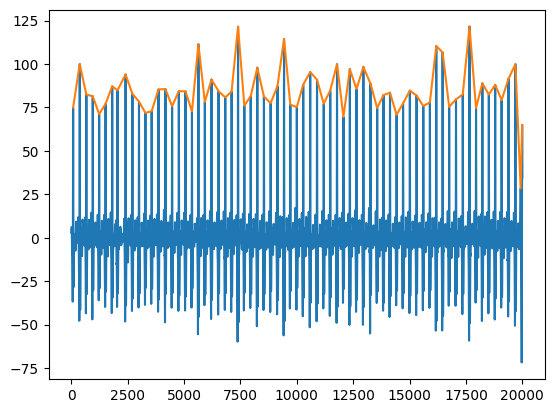

{'mean': 288.6231884057971, 'std': 31.077323597890175, 'min': 66, 'max': 358}

In [20]:
experiment.get_RR_statistics()

##Задача ** "Минигольф"

 в папке на githab